Lets start running a VAR on CPI, M2, and GDP

Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pathlib import Path

print("CMD", Path.cwd())

data = pd.read_csv('/Users/huey/Desktop/money_and_inflation/money_and_inflation/data/freddata.csv', parse_dates=['observation_date'], index_col='observation_date')

data["m2_qoq"] = np.log(data["M2SL"]).diff(1) # quarter over quarter M2 growth
data["gdp_qoq"] = np.log(data["GDPC1"]).diff(1) # Quarter over quarter GDP growth
data["cpi"] = data["CPILFESL_PC1"] / 100 # Convert percentage to decimal
data["m2gdpgrowth"] = data["m2_qoq"] - data["gdp_qoq"] # GDP growth minus M2 growth

data = data.dropna() # drops rows with NaN values


CMD /Users/huey/Desktop/money_and_inflation/money_and_inflation/notebooks


Now we will onfigure the data and graph is to get a visual representation of CPI, GDP, and M2

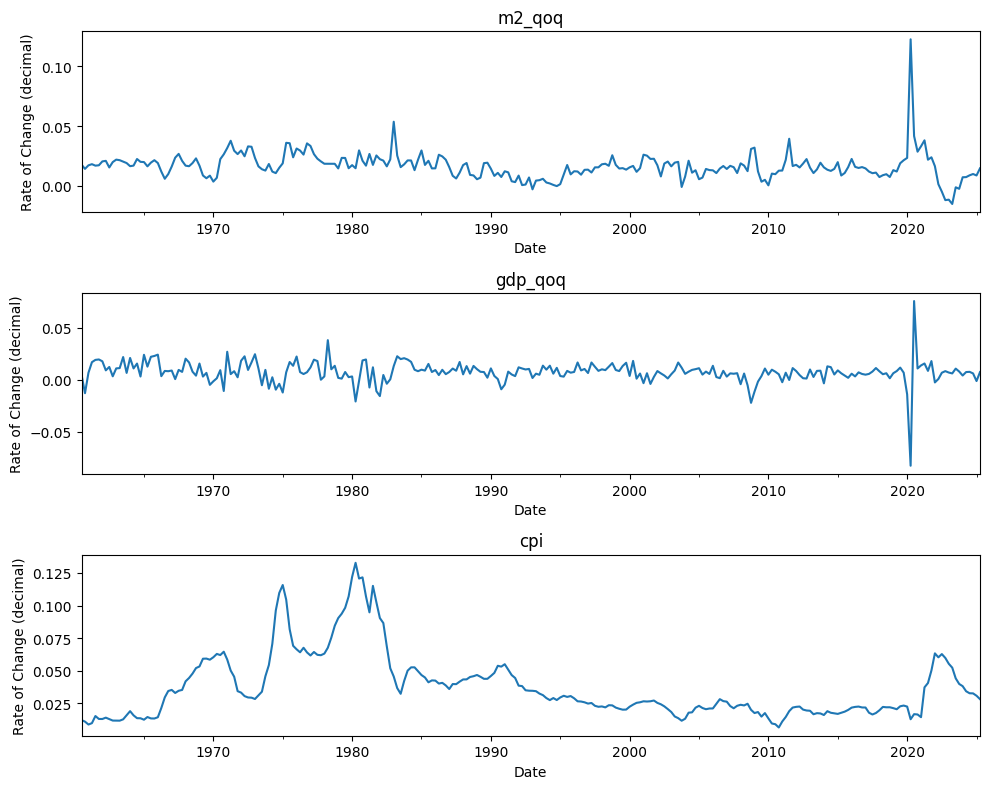

In [3]:
data["m2_qoq"] = np.log(data["M2SL"]).diff(1) # quarter over quarter M2 growth
data["gdp_qoq"] = np.log(data["GDPC1"]).diff(1) # Quarter over quarter GDP growth
data["cpi"] = data["CPILFESL_PC1"] / 100 # Convert percentage to decimal

data = data.dropna() # drops rows with NaN values

def plot_series(data):
    fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10, 8))
    for i, column in enumerate(data.columns):
        data[column].plot(ax=axes[i], title=column)
        axes[i].set_ylabel('Rate of Change (decimal)')
        axes[i].set_xlabel('Date')
    plt.tight_layout()
    plt.show()

plot_series(data[['m2_qoq', 'gdp_qoq', 'cpi']])




I am now going to split the data set in 2. 